In [2]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours

In [3]:
# Charger le dataset depuis un fichier CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
columns = [f'feature_{i+1}' for i in range(54)] + ['Cover_Type']
data = pd.read_csv(url, header=None, names=columns)

In [4]:
# Séparer les features et les labels
X = data.iloc[:, :-1]
y = data['Cover_Type']

In [5]:
# Normalisation des données pour que toutes les features soient à la même échelle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Application de T-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

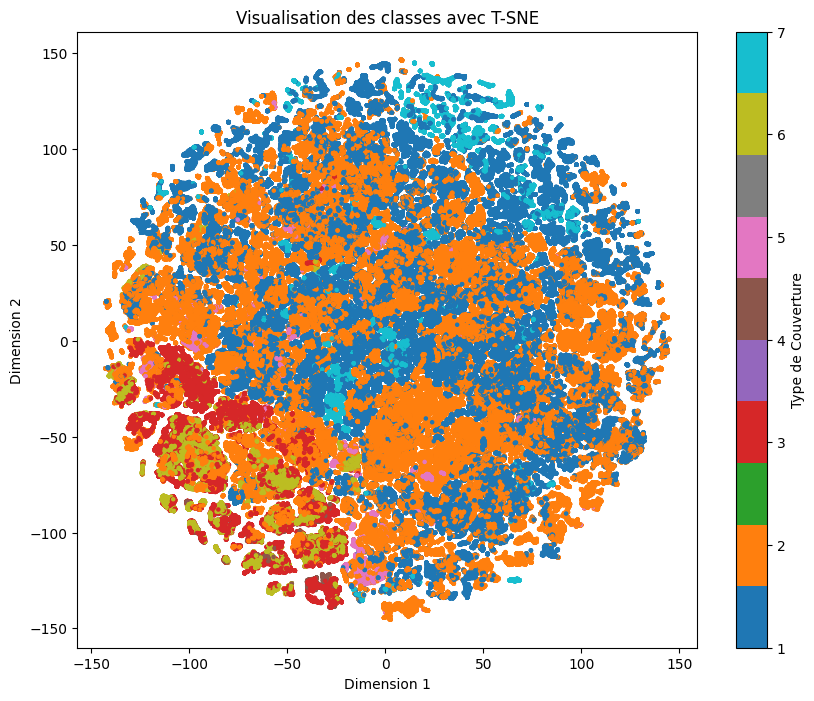

In [8]:
# Visualisation
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=5)
plt.colorbar(scatter, label='Type de Couverture')
plt.title("Visualisation des classes avec T-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [11]:
# Supprimer les classes dominent afin d'avoir le meme nombre dans toute les classes
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X_scaled, y)

print(pd.Series(y_resampled).value_counts())


Cover_Type
2    277031
1    206302
3     34630
7     20007
6     16351
5      8720
4      2747
Name: count, dtype: int64


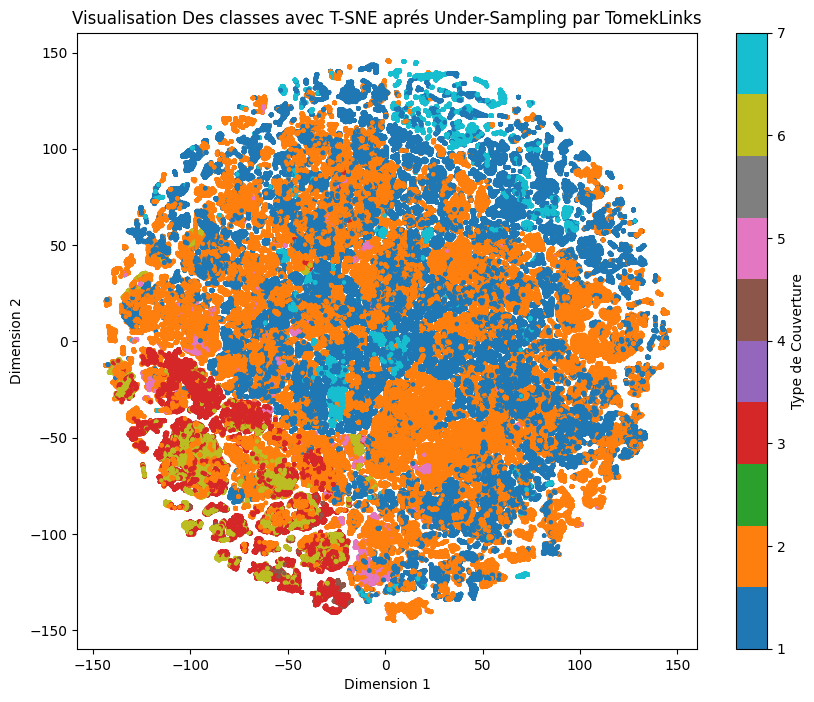

In [12]:
# Visualisation Des classes avec T-SNE aprés Under-Sampling par TomekLinks
X_tsne_TomekLinks = tsne.fit_transform(X_resampled)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne_TomekLinks[:, 0], X_tsne_TomekLinks[:, 1], c=y_resampled, cmap='tab10', s=5)
plt.colorbar(scatter, label='Type de Couverture')
plt.title("Visualisation Des classes avec T-SNE aprés Under-Sampling par TomekLinks")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [15]:
# Netoyer les chevauchements entre les classes
rus = RandomUnderSampler(random_state=42)
X_resampled_RandomUnderSampler, y_resampled_RandomUnderSampler = rus.fit_resample(X_scaled, y)
# Vérifiez la distribution après équilibrage
print(pd.Series(y_resampled_RandomUnderSampler).value_counts())  

Cover_Type
1    2747
2    2747
3    2747
4    2747
5    2747
6    2747
7    2747
Name: count, dtype: int64


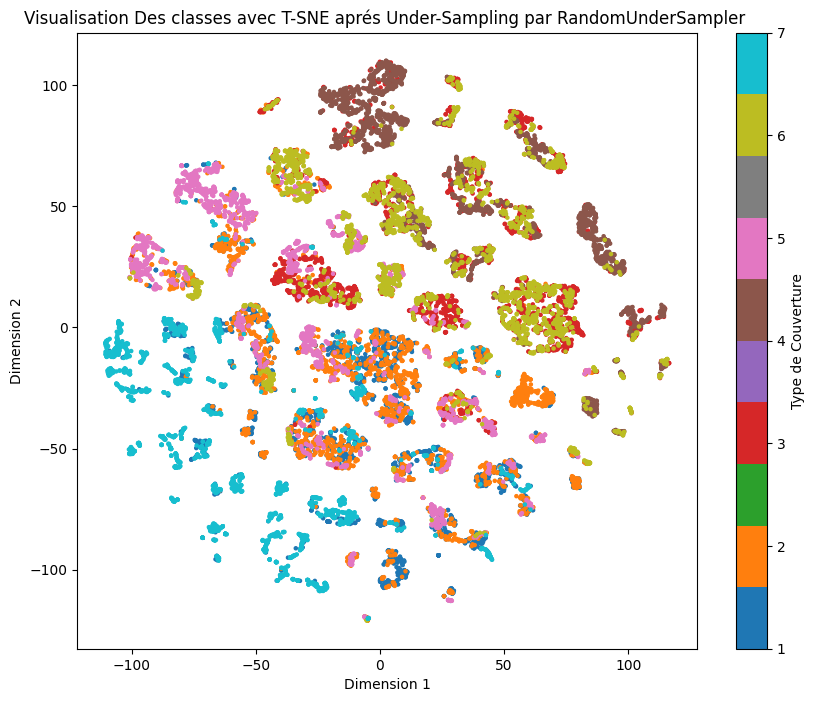

In [18]:
# Visualisation Des classes avec T-SNE aprés Under-Sampling par RandomUnderSampler
X_tsne_RandomUnderSampler = tsne.fit_transform(X_resampled_RandomUnderSampler)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne_RandomUnderSampler[:, 0], X_tsne_RandomUnderSampler[:, 1], c=y_resampled_RandomUnderSampler, cmap='tab10', s=5)
plt.colorbar(scatter, label='Type de Couverture')
plt.title("Visualisation Des classes avec T-SNE aprés Under-Sampling par RandomUnderSampler ")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [19]:
# nettoyer les échantillons mal classifiés
enn = EditedNearestNeighbours()
X_resampled_EditedNearestNeighbours, y_resampled_EditedNearestNeighbours = enn.fit_resample(X_scaled, y)
print(pd.Series(y_resampled_EditedNearestNeighbours).value_counts())

Cover_Type
2    247347
1    181432
3     28634
7     17926
6     11382
5      5971
4      2747
Name: count, dtype: int64


In [ ]:
# Visualisation Des classes avec T-SNE aprés Under-Sampling par EditedNearestNeighbours
X_tsne_EditedNearestNeighbours = tsne.fit_transform(X_resampled_EditedNearestNeighbours)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_resampled_EditedNearestNeighbours[:, 0], X_resampled_EditedNearestNeighbours[:, 1], c=y_resampled_EditedNearestNeighbours, cmap='tab10', s=5)
plt.colorbar(scatter, label='Type de Couverture')
plt.title("Visualisation Des classes avec T-SNE aprés Under-Sampling par EditedNearestNeighbours ")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()